# Playground for the OCT Dataset

This Jupyter Notebook allow us to train, save, load and predict with different models on the OCT Dataset. It also allows us to create different data splits for training, validation and warmup sets.

## 1) Choose which model you want to work with

You can choose between ResNet50V2, InceptionV3 or MobileNet. Run the corresponding cell below to load the packages necessary for the chosen model. Don't forget to setup config.yml before loading these packages, they will load the parameters set on that file.

### 1.1) ResNet50V2

In [1]:
from data_utils import *
from OCT_classifier2 import * 
from gradCam import *

Init Plugin
Init Graph Optimizer
Init Kernel


### 1.2) InceptionV3

In [ ]:
from data_utils import *
from OCT_classifier_Inception import * 
from gradCam import *

### 1.3) MobileNet

In [1]:
from data_utils import *
from OCT_classifier_MobileNet import * 
from gradCam import *

Init Plugin
Init Graph Optimizer
Init Kernel


## 2) Pre-processing

In [2]:
preProcess = PreProcessing()

### 2.1) Data Splitting

Create new train/val data splits from the original train dataset using the parameters set on config.yml

In [3]:
preProcess.split_data()

USING REGULAR DATA SPLIT
Creating:  /Users/gil/Downloads/datasets/oct/new_data_split 

The number of CNV images in the source train folder is:  37205
... copied 36461 CNV images to the new train set
... copied 744 CNV images to the new val set

The number of DME images in the source train folder is:  11348
... copied 11122 DME images to the new train set
... copied 226 DME images to the new val set

The number of DRUSEN images in the source train folder is:  8616
... copied 8444 DRUSEN images to the new train set
... copied 172 DRUSEN images to the new val set

The number of NORMAL images in the source train folder is:  26315
... copied 25789 NORMAL images to the new train set
... copied 526 NORMAL images to the new val set

Total files copied:  83484


Create a new warmup (x % of the data) train/val split from the train set created on the step according to the warmup_split parameter in config.yml 

In [3]:
preProcess.split_data(True)

USING WARM START
Creating:  /Users/gil/Downloads/datasets/oct/warm_start_data_split 

The number of CNV images in the source train folder is:  36461
... copied 1787 CNV images to the new train set
... copied 37 CNV images to the new val set

The number of DME images in the source train folder is:  11122
... copied 545 DME images to the new train set
... copied 12 DME images to the new val set

The number of DRUSEN images in the source train folder is:  8444
... copied 414 DRUSEN images to the new train set
... copied 9 DRUSEN images to the new val set

The number of NORMAL images in the source train folder is:  25789
... copied 1264 NORMAL images to the new train set
... copied 26 NORMAL images to the new val set

Total files copied:  4094


### 2.2) Data Generators

Get the data generators for the Train, Validation, Test and Warmup sets

In [3]:
generators_dic = preProcess.getGenerators()
generator_train  = generators_dic['generator_train']
generator_val    = generators_dic['generator_val']
generator_test   = generators_dic['generator_test']
generator_warmup = generators_dic['generator_warmup']

Found 81816 images belonging to 4 classes.
Found 1668 images belonging to 4 classes.
Found 1000 images belonging to 4 classes.
Found 4010 images belonging to 4 classes.


## Model Warmup Training:

In [5]:
clf=create_model(params)

Metal device set to: Apple M1


2021-08-24 23:22:16.188992: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-08-24 23:22:16.189162: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
clf.compile(optimizer = optim,
         loss       = params['compile']['loss'],
         metrics    = params['compile']['metrics'])

In [6]:
callbacks = get_callbacks("V_MobileNet_Warmup")

2021-08-24 23:01:10.358973: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-08-24 23:01:10.359028: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-08-24 23:01:10.359179: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.


In [7]:
clf.fit(x                     = generator_warmup,
        validation_data       = generator_val,
        batch_size            = params['fit']['batch_size'],
        epochs                = params['fit']['epochs'],
        verbose               = params['fit']['verbose'],
        callbacks             = callbacks)

/Users/gil/miniforge3/envs/oct_project/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
2021-08-24 23:01:24.413066: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-08-24 23:01:24.413289: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/5


2021-08-24 23:01:25.719124: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


  1/126 [..............................] - ETA: 12:15 - loss: 1.3595 - accuracy: 0.3125

2021-08-24 23:01:30.409880: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-08-24 23:01:30.409908: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.


  2/126 [..............................] - ETA: 1:45 - loss: 1.3088 - accuracy: 0.3281 

2021-08-24 23:01:31.173706: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-08-24 23:01:31.187226: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2021-08-24 23:01:31.202209: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/scalars/V_MobileNet_Warmup/20210824-230110/train/plugins/profile/2021_08_24_23_01_31
2021-08-24 23:01:31.206355: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to logs/scalars/V_MobileNet_Warmup/20210824-230110/train/plugins/profile/2021_08_24_23_01_31/Gils-Mac-mini.local.trace.json.gz
2021-08-24 23:01:31.220907: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/scalars/V_MobileNet_Warmup/20210824-230110/train/plugins/profile/2021_08_24_23_01_31
2021-08-24 23:01:31.221658: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for memo

126/126 [==============================] - ETA: 0s - loss: 0.7232 - accuracy: 0.7239

2021-08-24 23:02:47.216199: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


126/126 [==============================] - 91s 680ms/step - loss: 0.7232 - accuracy: 0.7239 - val_loss: 0.8034 - val_accuracy: 0.7290
Epoch 2/5
126/126 [==============================] - 84s 665ms/step - loss: 0.4188 - accuracy: 0.8499 - val_loss: 0.5272 - val_accuracy: 0.8213
Epoch 3/5
126/126 [==============================] - 84s 661ms/step - loss: 0.3267 - accuracy: 0.8815 - val_loss: 0.3579 - val_accuracy: 0.8711
Epoch 4/5
126/126 [==============================] - 84s 665ms/step - loss: 0.2967 - accuracy: 0.8933 - val_loss: 0.4367 - val_accuracy: 0.8531
Epoch 5/5
126/126 [==============================] - 84s 665ms/step - loss: 0.2626 - accuracy: 0.9097 - val_loss: 0.4664 - val_accuracy: 0.8603


## Prediction:

In [8]:
y_proba = clf.predict(generator_test)
y_pred = y_proba.argmax(axis=1)

2021-08-24 23:19:31.404684: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [9]:
y_true = generator_test.classes
evaluate(y_true,y_pred)

              precision    recall  f1-score   support

           0       0.62      0.99      0.76       250
           1       0.99      0.88      0.93       250
           2       0.99      0.43      0.60       250
           3       0.93      1.00      0.97       250

    accuracy                           0.83      1000
   macro avg       0.88      0.83      0.82      1000
weighted avg       0.88      0.83      0.82      1000

[[247   2   0   1]
 [ 21 221   1   7]
 [132   0 108  10]
 [  0   0   0 250]]


## Visualization:

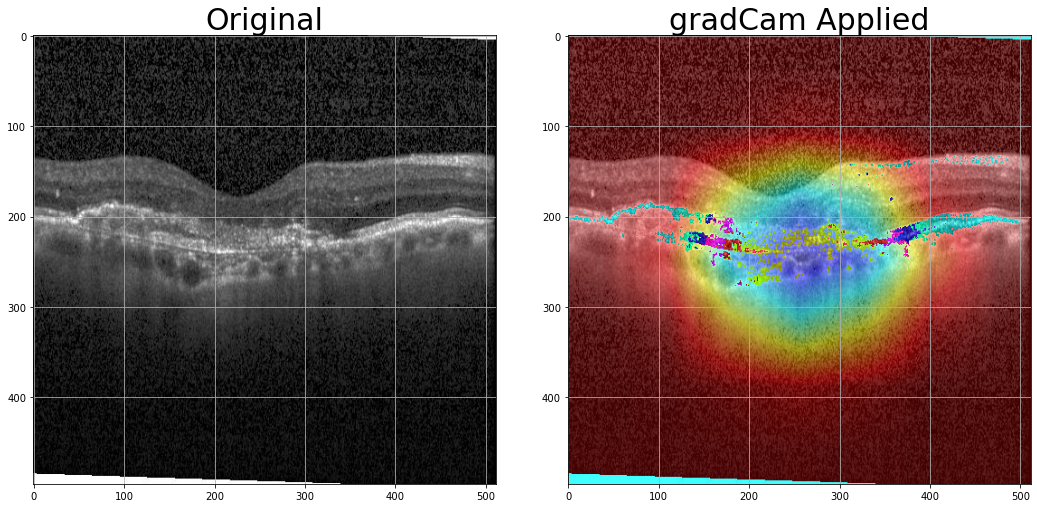

In [12]:
gradCAM(generator=generator_test,model=clf,params=params,image_num = 2, intensity=0.5, res=250)

## 1st Training Phase - 50 epochs

### Loading the weights from the Warmup Training Phase

In [9]:
!pwd

/Users/gil/Documents/Cursos/FourthBrain/Projects/Capstone/Samsung - OCT/dev/optical_coherence_tomography/src/OCT_Model


In [7]:
#checkpoint_dir = "V2_warmup"
checkpoint_dir = "/Users/gil/Documents/Cursos/FourthBrain/Projects/Capstone/Samsung - OCT/dev/optical_coherence_tomography/src/OCT_Model/logs/checkPoints/V_MobileNet_Warmup/checkpoints"
clf.load_weights(checkpoint_dir)

In [8]:
# New callback setup
callbacks = get_callbacks("V_MobileNet_train_50_epochs")

2021-08-24 23:22:50.504993: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-08-24 23:22:50.505022: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-08-24 23:22:50.505427: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.


### Training

In [9]:
clf.fit(x                     = generator_train,
        validation_data       = generator_val,
        batch_size            = params['fit']['batch_size'],
        epochs                = params['fit']['epochs'],
        verbose               = params['fit']['verbose'],
        callbacks             = callbacks)

/Users/gil/miniforge3/envs/oct_project/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
2021-08-24 23:22:55.503419: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-08-24 23:22:55.503582: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/50


2021-08-24 23:22:56.746298: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


   1/2557 [..............................] - ETA: 1:57:52 - loss: 0.2189 - accuracy: 0.9062

2021-08-24 23:22:58.385793: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-08-24 23:22:58.385807: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.


   2/2557 [..............................] - ETA: 31:10 - loss: 0.1939 - accuracy: 0.9219  

2021-08-24 23:22:59.016963: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-08-24 23:22:59.025885: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2021-08-24 23:22:59.035365: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/scalars/V_MobileNet_train_50_epochs/20210824-232250/train/plugins/profile/2021_08_24_23_22_59
2021-08-24 23:22:59.037540: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to logs/scalars/V_MobileNet_train_50_epochs/20210824-232250/train/plugins/profile/2021_08_24_23_22_59/Gils-Mac-mini.local.trace.json.gz
2021-08-24 23:22:59.043472: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/scalars/V_MobileNet_train_50_epochs/20210824-232250/train/plugins/profile/2021_08_24_23_22_59
2021-08-24 23:22:59.044036: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped

2557/2557 [==============================] - ETA: 0s - loss: 0.2292 - accuracy: 0.9207

2021-08-24 23:48:28.231140: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2557/2557 [==============================] - 1541s 602ms/step - loss: 0.2292 - accuracy: 0.9207 - val_loss: 0.2015 - val_accuracy: 0.9317
Epoch 2/50
2557/2557 [==============================] - 1548s 605ms/step - loss: 0.1742 - accuracy: 0.9387 - val_loss: 0.1532 - val_accuracy: 0.9478
Epoch 3/50
2557/2557 [==============================] - 1551s 607ms/step - loss: 0.1548 - accuracy: 0.9457 - val_loss: 0.2698 - val_accuracy: 0.9418
Epoch 4/50
2557/2557 [==============================] - 1558s 609ms/step - loss: 0.1423 - accuracy: 0.9496 - val_loss: 0.2945 - val_accuracy: 0.9508
Epoch 5/50
2557/2557 [==============================] - 1543s 603ms/step - loss: 0.1300 - accuracy: 0.9539 - val_loss: 0.1923 - val_accuracy: 0.9424
Epoch 6/50
2557/2557 [==============================] - 1545s 604ms/step - loss: 0.1226 - accuracy: 0.9561 - val_loss: 0.1428 - val_accuracy: 0.9484
Epoch 7/50
2557/2557 [==============================] - 1548s 605ms/step - loss: 0.1160 - accuracy: 0.9582 - val_loss

## Prediction

In [10]:
y_proba = clf.predict(generator_test)
y_pred = y_proba.argmax(axis=1)

2021-08-25 21:02:45.147948: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [11]:
y_true = generator_test.classes
evaluate(y_true,y_pred)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       250
           1       1.00      0.99      1.00       250
           2       1.00      0.98      0.99       250
           3       1.00      0.99      1.00       250

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000

[[250   0   0   0]
 [  2 248   0   0]
 [  6   0 244   0]
 [  2   0   0 248]]


## Saving the Model

In [12]:
save_path = "/Users/gil/Documents/Cursos/FourthBrain/Projects/Capstone/Samsung - OCT/dev/optical_coherence_tomography/src/OCT_Model/logs/saved_models/V_MobileNet_train_50_epochs"
clf.save(save_path)

2021-08-25 21:03:55.276590: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
/Users/gil/miniforge3/envs/oct_project/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: /Users/gil/Documents/Cursos/FourthBrain/Projects/Capstone/Samsung - OCT/dev/optical_coherence_tomography/src/OCT_Model/logs/saved_models/V_MobileNet_train_50_epochs/assets


## Load the Weights from a Checkpoint folder

In [5]:
#checkpoint_dir = "V2_warmup"
checkpoint_dir = "/Users/gil/Documents/Cursos/FourthBrain/Projects/Capstone/Samsung - OCT/dev/optical_coherence_tomography/src/OCT_Model/logs/checkPoints/V2_5_perc_data/checkpoints"
clf.load_weights(checkpoint_dir)

## Predict with the Loaded Weights

In [6]:
y_proba = clf.predict(generator_test)
y_pred = y_proba.argmax(axis=1)

2021-08-23 17:57:02.885255: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-08-23 17:57:02.886505: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2021-08-23 17:57:03.052751: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [7]:
y_true = generator_test.classes
evaluate(y_true,y_pred)

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       250
           1       0.99      0.99      0.99       250
           2       1.00      0.95      0.97       250
           3       1.00      1.00      1.00       250

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000

[[248   2   0   0]
 [  3 247   0   0]
 [ 13   0 237   0]
 [  0   0   0 250]]


## Load a SavedModel

In [6]:
save_path = "/Users/gil/Documents/Cursos/FourthBrain/Projects/Capstone/Samsung - OCT/dev/optical_coherence_tomography/src/OCT_Model/logs/saved_models/V2_train_50_epochs"
clf = tf.keras.models.load_model(save_path)

## Converting to Tensorflow Lite

In [13]:
# Setting the path for the savedModel
save_path = "/Users/gil/Documents/Cursos/FourthBrain/Projects/Capstone/Samsung - OCT/dev/optical_coherence_tomography/src/OCT_Model/logs/saved_models/V_MobileNet_train_50_epochs"

# Defining the optimizaion strategy
optimization = tf.lite.Optimize.DEFAULT

# Loading the savedModel into the TFLite Converter
converter = tf.lite.TFLiteConverter.from_saved_model(save_path)

# Set the optimzations
converter.optimizations = [optimization]

# Invoke the converter to finally generate the TFLite model
tflite_model = converter.convert()

2021-08-25 21:05:10.435984: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:345] Ignored output_format.
2021-08-25 21:05:10.436000: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:348] Ignored drop_control_dependency.
2021-08-25 21:05:10.436003: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:354] Ignored change_concat_input_ranges.
2021-08-25 21:05:10.448736: I tensorflow/cc/saved_model/reader.cc:38] Reading SavedModel from: /Users/gil/Documents/Cursos/FourthBrain/Projects/Capstone/Samsung - OCT/dev/optical_coherence_tomography/src/OCT_Model/logs/saved_models/V_MobileNet_train_50_epochs
2021-08-25 21:05:10.472428: I tensorflow/cc/saved_model/reader.cc:90] Reading meta graph with tags { serve }
2021-08-25 21:05:10.472449: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: /Users/gil/Documents/Cursos/FourthBrain/Projects/Capstone/Samsung - OCT/dev/optical_coherence_tomography/src/OCT_Mod

In [15]:
import pathlib

# Saving the tflite_model to file
tflite_save_path = "/Users/gil/Documents/Cursos/FourthBrain/Projects/Capstone/Samsung - OCT/dev/optical_coherence_tomography/src/OCT_Model/logs/tflite_models/V_MobileNet_train_50_epochs/model_oct_mobilenet_v3_224.tflite"
tflite_model_file = pathlib.Path(tflite_save_path)
tflite_model_file.write_bytes(tflite_model)

6665360

## Test the TFLite model

In [24]:
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]

In [25]:
# Run the generator_test through the TFLite model and get predictions
predictions = []
test_labels = []
batch = 0

# Loop through batches in the generator_test
for img_batch, label_batch in generator_test:
    
    # Because our generator has batches of size 32 we need to loop
    # through all the examples in each batch. The last batch is smaller
    batch_size = img_batch.shape[0]
    batch += 1
    for i in range(batch_size):
        img = img_batch[np.newaxis,i]
        print(img.shape)
        label = label_batch[i]
        print(label.shape)
        print(interpreter.get_input_details()[0])
        interpreter.set_tensor(input_index, img)
        interpreter.invoke()
        predictions.append(np.argmax(interpreter.get_tensor(output_index)))
        test_labels.append(np.argmax(label))
    
    # We need to break the loop by hand because the generator
    # loops indefinitely
    if batch >= generator_test.classes.shape[0] / 32:
        break

(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantiz

(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantiz

(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantiz

(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantiz

(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantiz

(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantiz

(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantiz

(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantiz

(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantiz

(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantiz

(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantiz

(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantiz

(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantiz

(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantiz

(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantiz

(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantiz

(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantiz

(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantiz

(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantiz

(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantiz

(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantiz

(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantiz

(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantiz

(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantiz

(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantiz

(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantiz

(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantiz

(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantiz

(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantiz

(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
(1, 224, 224, 3)
(4,)
{'name': 'input_1', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantiz

In [26]:
evaluate(test_labels,predictions)

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       250
           1       0.96      0.97      0.96       250
           2       1.00      0.90      0.95       250
           3       1.00      0.90      0.95       250

    accuracy                           0.94      1000
   macro avg       0.95      0.94      0.94      1000
weighted avg       0.95      0.94      0.94      1000

[[248   2   0   0]
 [  7 243   0   0]
 [ 23   2 224   1]
 [ 18   7   0 225]]


## Convert MobileNet to TFLite - Special case

***Load the SavedModel first***

In [22]:
save_path = "/Users/gil/Documents/Cursos/FourthBrain/Projects/Capstone/Samsung - OCT/dev/optical_coherence_tomography/src/OCT_Model/logs/saved_models/V_MobileNet_train_50_epochs"
mobilenet_model = tf.keras.models.load_model(save_path)
mobilenet_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv (Conv2D)                   (None, None, None, 1 432         rescaling[0][0]                  
__________________________________________________________________________________________________
Conv/BatchNorm (BatchNormalizat (None, None, None, 1 64          Conv[0][0]                       
______________________________________________________________________________________________

In [23]:
# Setting the path for the savedModel
save_path = "/Users/gil/Documents/Cursos/FourthBrain/Projects/Capstone/Samsung - OCT/dev/optical_coherence_tomography/src/OCT_Model/logs/saved_models/V_MobileNet_train_50_epochs"

# Defining the proper input shape for the model
concrete_func = mobilenet_model.signatures[
  tf.saved_model.DEFAULT_SERVING_SIGNATURE_DEF_KEY]
concrete_func.inputs[0].set_shape([None, 224, 224, 3])
converter = tf.lite.TFLiteConverter.from_concrete_functions([concrete_func])

# Defining the optimizaion strategy
optimization = tf.lite.Optimize.DEFAULT

# Set the optimzations
converter.optimizations = [optimization]

# Invoke the converter to finally generate the TFLite model
tflite_model = converter.convert()

2021-08-25 22:15:41.291324: I tensorflow/core/grappler/devices.cc:78] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0 (Note: TensorFlow was not compiled with CUDA or ROCm support)
2021-08-25 22:15:41.292176: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2021-08-25 22:15:41.293564: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-08-25 22:15:41.293584: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2021-08-25 22:15:41.346384: I tensorflow/core/grappler/optimizers/meta_optimizer.cc:1144] Optimization results for grappler item: graph_to_optimize
  function_optimizer: Graph

In [ ]:
import pathlib

# Saving the tflite_model to file
tflite_save_path = "/Users/gil/Documents/Cursos/FourthBrain/Projects/Capstone/Samsung - OCT/dev/optical_coherence_tomography/src/OCT_Model/logs/tflite_models/V_MobileNet_train_50_epochs/model_oct_mobilenet_v3_224.tflite"
tflite_model_file = pathlib.Path(tflite_save_path)
tflite_model_file.write_bytes(tflite_model)

In [27]:
import pathlib

# Saving the tflite_model to file
tflite_save_path = "/Users/gil/Documents/Cursos/FourthBrain/Projects/Capstone/Samsung - OCT/dev/optical_coherence_tomography/src/OCT_Model/logs/tflite_models/V_MobileNet_train_50_epochs/model_oct_mobilenet_v3_224.tflite"
tflite_model_file = pathlib.Path(tflite_save_path)
tflite_model_file.write_bytes(tflite_model)

6706880